In [1]:
%matplotlib inline 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import os

PROJECT_BASE = os.path.dirname(os.getcwd())
RESULTS_DIR = os.path.join(PROJECT_BASE, "Data", "RunInfo")
FIGURE_DIR = os.path.join(PROJECT_BASE, "Figures")

In [2]:
results_4_file = os.path.join(RESULTS_DIR, "4.quantify_transcripts.results.tsv")
results_6_file = os.path.join(RESULTS_DIR, "6.bwa_align.results.tsv")
results_8_file = os.path.join(RESULTS_DIR, "8.map_trio.results.tsv")
results_9_file = os.path.join(RESULTS_DIR, "9.family_call_variants.results.tsv")

results_4 = pd.read_csv(results_4_file, sep="\t")
results_6 = pd.read_csv(results_6_file, sep="\t")
results_8 = pd.read_csv(results_8_file, sep="\t")
results_9 = pd.read_csv(results_9_file, sep="\t")

In [3]:
results_4.head()

,job_id,run_type,run_time,cpus,cores_threads,core_utilization,core_walltime,percent_core_efficiency,gb_memory_used
0,9382726,host,00:17:52,16,128,04:18:37,04:45:52,90.47,13.93
1,9382596,container,00:16:33,16,128,03:58:50,04:24:48,90.19,13.97
2,9382594,host,00:19:54,12,96,03:40:27,03:58:48,92.32,13.06
3,9382592,container,00:18:14,12,96,03:21:57,03:38:48,92.30,13.42
4,9381832,host,00:20:34,8,64,02:35:46,02:44:32,94.67,10.12


In [4]:
results_6.head()

,job_id,run_type,run_time,cpus,cores_threads,core_utilization,core_walltime,percent_core_efficiency,gb_memory_used
0,9394837,host,01:26:19,16,126,14:55:57,23:01:04,64.87,48.80
1,9394838,container,01:19:32,16,126,14:27:59,21:12:32,68.21,48.75
2,9381812,host,02:06:17,8,64,13:47:56,16:50:16,81.95,29.55
3,9381811,container,01:55:48,8,64,13:11:58,15:26:24,85.49,29.45
4,9374473,container,06:15:18,2,16,12:24:58,12:30:36,99.25,11.87


In [5]:
results_8.head()

,job_id,run_type,run_time,cpus,cores_threads,core_utilization,core_walltime,percent_core_efficiency,gb_memory_used
0,9455903,container,00:45:40,8,64,05:05:19,06:05:20,83.57,42.83
1,9455904,host,00:45:10,8,64,05:00:28,06:01:20,83.15,40.57
2,9450125,container,00:50:37,8,64,05:43:33,06:44:56,84.84,41.62
3,9450126,host,00:44:53,8,64,04:57:48,05:59:04,82.94,42.01
4,9449942,container,00:46:29,8,64,05:10:53,06:11:52,83.60,42.16


In [6]:
results_9.head()

,job_id,run_type,run_time,cpus,cores_threads,core_utilization,core_walltime,percent_core_efficiency,gb_memory_used
0,9472786,container,00:42:47,8,64,04:40:15,05:42:16,81.88,23.93
1,9472785,host,00:40:44,8,64,04:35:11,05:25:52,84.45,23.56
2,9471869,container,00:42:14,8,64,04:32:42,05:37:52,80.71,20.40
3,9471868,host,00:41:40,8,64,04:37:28,05:33:20,83.24,21.63
4,9470489,container,00:42:26,8,64,04:36:42,05:39:28,81.51,25.86


In [7]:
def convert_to_seconds(time_string):
    if '-' in time_string:
        d = int(time_string.split('-')[0])
        temp = [int(x) for x in time_string.split('-')[1].split(':')]
        h, m, s = temp[0], temp[1], temp[2]
        elapsed_seconds = d * ((60 ** 2) * 24) + h * 60 ** 2 + m * 60 + s
        return elapsed_seconds
    else:
        temp = [int(x) for x in time_string.split(':')]
        h, m, s = temp[0], temp[1], temp[2]
        elapsed_seconds = h * 60 ** 2 + m * 60 + s
        return elapsed_seconds

In [8]:
results_4["run_time"] = results_4["run_time"].apply(lambda x: convert_to_seconds(x))
results_4["core_utilization"] = results_4["core_utilization"].apply(lambda x: convert_to_seconds(x))
results_4["core_walltime"] = results_4["core_walltime"].apply(lambda x: convert_to_seconds(x))

results_6["run_time"] = results_6["run_time"].apply(lambda x: convert_to_seconds(x))
results_6["core_utilization"] = results_6["core_utilization"].apply(lambda x: convert_to_seconds(x))
results_6["core_walltime"] = results_6["core_walltime"].apply(lambda x: convert_to_seconds(x))

results_8["run_time"] = results_8["run_time"].apply(lambda x: convert_to_seconds(x))
results_8["core_utilization"] = results_8["core_utilization"].apply(lambda x: convert_to_seconds(x))
results_8["core_walltime"] = results_8["core_walltime"].apply(lambda x: convert_to_seconds(x))

results_9["run_time"] = results_9["run_time"].apply(lambda x: convert_to_seconds(x))
results_9["core_utilization"] = results_9["core_utilization"].apply(lambda x: convert_to_seconds(x))
results_9["core_walltime"] = results_9["core_walltime"].apply(lambda x: convert_to_seconds(x))

In [9]:
results_4.head()

,job_id,run_type,run_time,cpus,cores_threads,core_utilization,core_walltime,percent_core_efficiency,gb_memory_used
0,9382726,host,1072,16,128,15517,17152,90.47,13.93
1,9382596,container,993,16,128,14330,15888,90.19,13.97
2,9382594,host,1194,12,96,13227,14328,92.32,13.06
3,9382592,container,1094,12,96,12117,13128,92.30,13.42
4,9381832,host,1234,8,64,9346,9872,94.67,10.12


In [10]:
results_6.head()

,job_id,run_type,run_time,cpus,cores_threads,core_utilization,core_walltime,percent_core_efficiency,gb_memory_used
0,9394837,host,5179,16,126,53757,82864,64.87,48.80
1,9394838,container,4772,16,126,52079,76352,68.21,48.75
2,9381812,host,7577,8,64,49676,60616,81.95,29.55
3,9381811,container,6948,8,64,47518,55584,85.49,29.45
4,9374473,container,22518,2,16,44698,45036,99.25,11.87


In [11]:
results_8.head()

,job_id,run_type,run_time,cpus,cores_threads,core_utilization,core_walltime,percent_core_efficiency,gb_memory_used
0,9455903,container,2740,8,64,18319,21920,83.57,42.83
1,9455904,host,2710,8,64,18028,21680,83.15,40.57
2,9450125,container,3037,8,64,20613,24296,84.84,41.62
3,9450126,host,2693,8,64,17868,21544,82.94,42.01
4,9449942,container,2789,8,64,18653,22312,83.60,42.16


In [12]:
results_9.head()

,job_id,run_type,run_time,cpus,cores_threads,core_utilization,core_walltime,percent_core_efficiency,gb_memory_used
0,9472786,container,2567,8,64,16815,20536,81.88,23.93
1,9472785,host,2444,8,64,16511,19552,84.45,23.56
2,9471869,container,2534,8,64,16362,20272,80.71,20.40
3,9471868,host,2500,8,64,16648,20000,83.24,21.63
4,9470489,container,2546,8,64,16602,20368,81.51,25.86


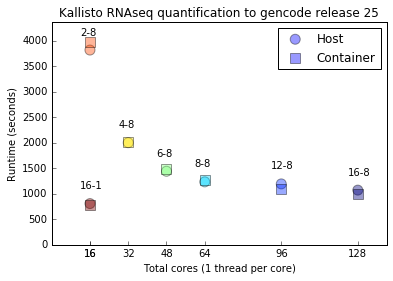

In [13]:
r4h = results_4[results_4["run_type"] == "host"]
r4c = results_4[results_4["run_type"] == "container"]

cpus = (r4h["cpus"]).astype(str).values
cores_per_cpu = (r4h["cores_threads"] / r4h["cpus"]).astype(int).astype(str).values
x_labels = ["-".join([a, b]) for a, b in zip(cpus, cores_per_cpu)]

plt.scatter(r4h["cores_threads"], r4h["run_time"], c=list(range(r4h.shape[0])), cmap=cm.jet, marker="o", s=100, alpha=0.4, label="Host")
plt.scatter(r4c["cores_threads"], r4c["run_time"], c=list(range(r4h.shape[0])), cmap=cm.jet, marker="s", s=100, alpha=0.4, label="Container")
plt.xlabel("Total cores (1 thread per core)")
plt.ylabel("Runtime (seconds)")
plt.xticks(r4h["cores_threads"])
plt.ylim(0, max(results_4["run_time"]) * 1.1)
plt.legend(scatterpoints=1)
plt.tick_params(top="off", right="off")
plt.title("Kallisto RNAseq quantification to gencode release 25")

for lab, x, y in zip(x_labels, r4h["cores_threads"], r4h["run_time"]):
    plt.annotate(lab, xy=(x, y), xycoords='data', xytext=(-10, 15), textcoords='offset points')
    
plt.savefig(os.path.join(FIGURE_DIR, "4.runtime.png"))

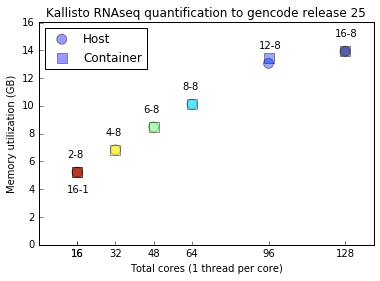

In [14]:
plt.scatter(r4h["cores_threads"], r4h["gb_memory_used"], c=list(range(r4h.shape[0])), cmap=cm.jet, marker="o", s=100, alpha=0.4, label="Host")
plt.scatter(r4c["cores_threads"], r4c["gb_memory_used"], c=list(range(r4h.shape[0])), cmap=cm.jet, marker="s", s=100, alpha=0.4, label="Container")
plt.xlabel("Total cores (1 thread per core)")
plt.ylabel("Memory utilization (GB)")
plt.xticks(r4h["cores_threads"])
plt.ylim(0, max(results_4["gb_memory_used"]) * 1.15)
plt.legend(scatterpoints=1, loc=2)
plt.tick_params(top="off", right="off")
plt.title("Kallisto RNAseq quantification to gencode release 25")

for lab, x, y in zip(x_labels[0:-1], r4h["cores_threads"][0:-1], r4h["gb_memory_used"][0:-1]):
    plt.annotate(lab, xy=(x, y), xycoords='data', xytext=(-10, 15), textcoords='offset points')

plt.annotate(x_labels[-1], xy=(r4h["cores_threads"].iloc[-1], r4h["gb_memory_used"].iloc[-1]), xycoords='data', xytext=(-10, -20), textcoords='offset points')

plt.savefig(os.path.join(FIGURE_DIR, "4.memory.png"))

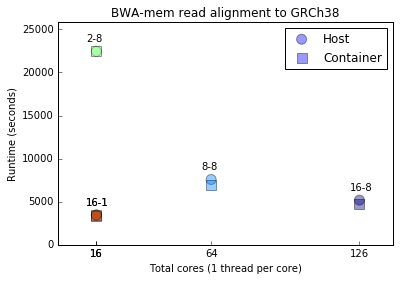

In [15]:
r6h = results_6[results_6["run_type"] == "host"]
r6c = results_6[results_6["run_type"] == "container"]

cpus = (r6h["cpus"]).astype(str).values
cores_per_cpu = (r6h["cores_threads"] / r6h["cpus"]).astype(int).astype(str).values
x_labels = ["-".join([a, b]) for a, b in zip(cpus, cores_per_cpu)]
x_labels = ["16-8"] + x_labels[1:]

plt.scatter(r6h["cores_threads"], r6h["run_time"], c=list(range(r6h.shape[0])), cmap=cm.jet, marker="o", s=100, alpha=0.4, label="Host")
plt.scatter(r6c["cores_threads"], r6c["run_time"], c=list(range(r6h.shape[0])), cmap=cm.jet, marker="s", s=100, alpha=0.4, label="Container")
plt.xlabel("Total cores (1 thread per core)")
plt.ylim(0, max(results_6["run_time"]) * 1.15)
plt.ylabel("Runtime (seconds)")
plt.xticks(r6h["cores_threads"])
plt.legend(scatterpoints=1)
plt.tick_params(top="off", right="off")
plt.title("BWA-mem read alignment to GRCh38")

for lab, x, y in zip(x_labels, r6h["cores_threads"], r6h["run_time"]):
    plt.annotate(lab, xy=(x, y), xycoords='data', xytext=(-10, 10), textcoords='offset points')
    
plt.savefig(os.path.join(FIGURE_DIR, "6.runtime.png"))

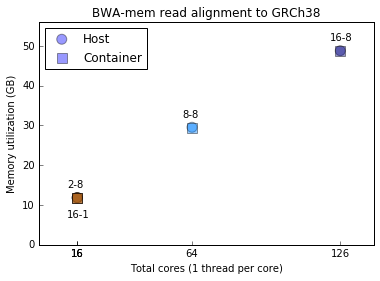

In [16]:
plt.scatter(r6h["cores_threads"], r6h["gb_memory_used"], c=list(range(r6h.shape[0])), cmap=cm.jet, marker="o", s=100, alpha=0.4, label="Host")
plt.scatter(r6c["cores_threads"], r6c["gb_memory_used"], c=list(range(r6h.shape[0])), cmap=cm.jet, marker="s", s=100, alpha=0.4, label="Container")
plt.xlabel("Total cores (1 thread per core)")
plt.ylim(0, max(results_6["gb_memory_used"]) * 1.15)
plt.ylabel("Memory utilization (GB)")
plt.xticks(r6h["cores_threads"])
plt.legend(scatterpoints=1, loc=2)
plt.tick_params(top="off", right="off")
plt.title("BWA-mem read alignment to GRCh38")

for lab, x, y in zip(x_labels[0:-2], r6h["cores_threads"][0:-2], r6h["gb_memory_used"][0:-2]):
    plt.annotate(lab, xy=(x, y), xycoords='data', xytext=(-10, 10), textcoords='offset points')
    
plt.annotate(x_labels[-1], xy=(r6h["cores_threads"].iloc[-1], r6h["gb_memory_used"].iloc[-1]), xycoords='data', xytext=(-10, -20), textcoords='offset points')

plt.savefig(os.path.join(FIGURE_DIR, "6.memory.png"))

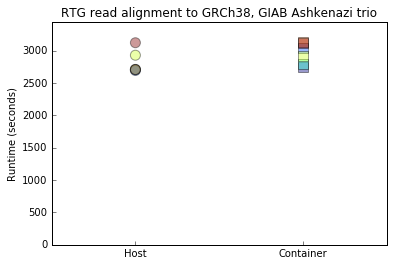

In [17]:
r8h = results_8[results_8["run_type"] == "host"]
r8c = results_8[results_8["run_type"] == "container"]

plt.scatter([0] * r8h.shape[0], r8h["run_time"], c=list(range(r8h.shape[0])), cmap=cm.jet, marker="o", s=100, alpha=0.4, label="Host")
plt.scatter([1] * r8c.shape[0], r8c["run_time"], c=list(range(r8h.shape[0])), cmap=cm.jet, marker="s", s=100, alpha=0.4, label="Container")
plt.xlim(-0.5, 1.5)
plt.ylim(0, max(results_8["run_time"]) * 1.1)
plt.ylabel("Runtime (seconds)")
plt.xticks([0, 1], ["Host", "Container"])
plt.tick_params(top="off", right="off")
plt.title("RTG read alignment to GRCh38, GIAB Ashkenazi trio")

plt.savefig(os.path.join(FIGURE_DIR, "8.runtime.full.png"))

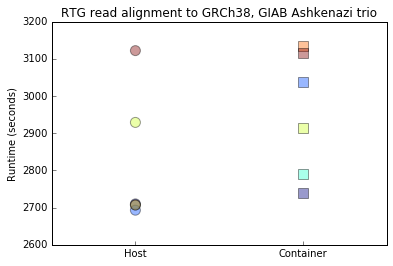

In [18]:
r8h = results_8[results_8["run_type"] == "host"]
r8c = results_8[results_8["run_type"] == "container"]

plt.scatter([0] * r8h.shape[0], r8h["run_time"], c=list(range(r8h.shape[0])), cmap=cm.jet, marker="o", s=100, alpha=0.4, label="Host")
plt.scatter([1] * r8c.shape[0], r8c["run_time"], c=list(range(r8h.shape[0])), cmap=cm.jet, marker="s", s=100, alpha=0.4, label="Container")
plt.xlim(-0.5, 1.5)
plt.ylabel("Runtime (seconds)")
plt.xticks([0, 1], ["Host", "Container"])
plt.tick_params(top="off", right="off")
plt.title("RTG read alignment to GRCh38, GIAB Ashkenazi trio")

plt.savefig(os.path.join(FIGURE_DIR, "8.runtime.condensed.png"))

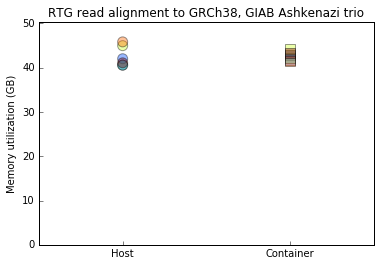

In [19]:
plt.scatter([0] * r8h.shape[0], r8h["gb_memory_used"], c=list(range(r8h.shape[0])), cmap=cm.jet, marker="o", s=100, alpha=0.4, label="Host")
plt.scatter([1] * r8c.shape[0], r8c["gb_memory_used"], c=list(range(r8h.shape[0])), cmap=cm.jet, marker="s", s=100, alpha=0.4, label="Container")
plt.xlim(-0.5, 1.5)
plt.ylim(0, max(results_8["gb_memory_used"]) * 1.1)
plt.ylabel("Memory utilization (GB)")
plt.xticks([0, 1], ["Host", "Container"])
plt.tick_params(top="off", right="off")
plt.title("RTG read alignment to GRCh38, GIAB Ashkenazi trio")

plt.savefig(os.path.join(FIGURE_DIR, "8.memory.full.png"))

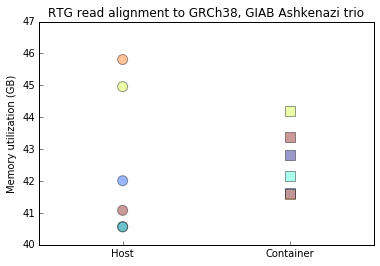

In [20]:
plt.scatter([0] * r8h.shape[0], r8h["gb_memory_used"], c=list(range(r8h.shape[0])), cmap=cm.jet, marker="o", s=100, alpha=0.4, label="Host")
plt.scatter([1] * r8c.shape[0], r8c["gb_memory_used"], c=list(range(r8h.shape[0])), cmap=cm.jet, marker="s", s=100, alpha=0.4, label="Container")
plt.xlim(-0.5, 1.5)
plt.ylabel("Memory utilization (GB)")
plt.xticks([0, 1], ["Host", "Container"])
plt.tick_params(top="off", right="off")
plt.title("RTG read alignment to GRCh38, GIAB Ashkenazi trio")

plt.savefig(os.path.join(FIGURE_DIR, "8.memory.condensed.png"))

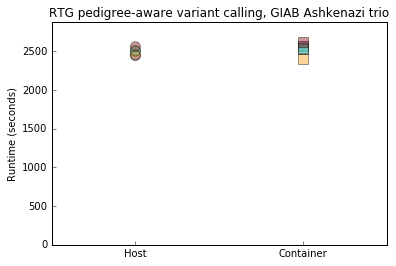

In [21]:
r9h = results_9[results_9["run_type"] == "host"]
r9c = results_9[results_9["run_type"] == "container"]

plt.scatter([0] * r9h.shape[0], r9h["run_time"], c=list(range(r9h.shape[0])), cmap=cm.jet, marker="o", s=100, alpha=0.4, label="Host")
plt.scatter([1] * r9c.shape[0], r9c["run_time"], c=list(range(r9h.shape[0])), cmap=cm.jet, marker="s", s=100, alpha=0.4, label="Container")
plt.xlim(-0.5, 1.5)
plt.ylim(0, max(results_9["run_time"]) * 1.1)
plt.ylabel("Runtime (seconds)")
plt.xticks([0, 1], ["Host", "Container"])
plt.tick_params(top="off", right="off")
plt.title("RTG pedigree-aware variant calling, GIAB Ashkenazi trio")

plt.savefig(os.path.join(FIGURE_DIR, "9.runtime.full.png"))

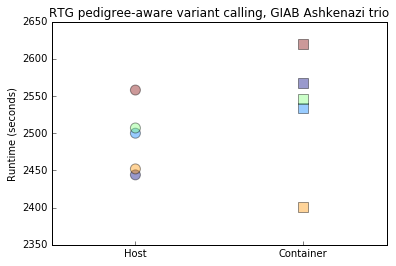

In [22]:
r9h = results_9[results_9["run_type"] == "host"]
r9c = results_9[results_9["run_type"] == "container"]

plt.scatter([0] * r9h.shape[0], r9h["run_time"], c=list(range(r9h.shape[0])), cmap=cm.jet, marker="o", s=100, alpha=0.4, label="Host")
plt.scatter([1] * r9c.shape[0], r9c["run_time"], c=list(range(r9h.shape[0])), cmap=cm.jet, marker="s", s=100, alpha=0.4, label="Container")
plt.xlim(-0.5, 1.5)
plt.ylabel("Runtime (seconds)")
plt.xticks([0, 1], ["Host", "Container"])
plt.tick_params(top="off", right="off")
plt.title("RTG pedigree-aware variant calling, GIAB Ashkenazi trio")

plt.savefig(os.path.join(FIGURE_DIR, "9.runtime.condensed.png"))

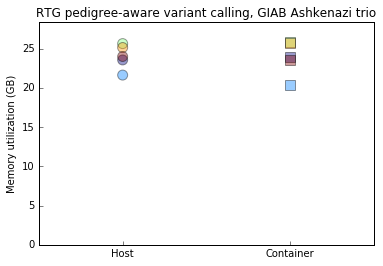

In [23]:
plt.scatter([0] * r9h.shape[0], r9h["gb_memory_used"], c=list(range(r9h.shape[0])), cmap=cm.jet, marker="o", s=100, alpha=0.4, label="Host")
plt.scatter([1] * r9c.shape[0], r9c["gb_memory_used"], c=list(range(r9h.shape[0])), cmap=cm.jet, marker="s", s=100, alpha=0.4, label="Container")
plt.xlim(-0.5, 1.5)
plt.ylim(0, max(results_9["gb_memory_used"]) * 1.1)
plt.ylabel("Memory utilization (GB)")
plt.xticks([0, 1], ["Host", "Container"])
plt.tick_params(top="off", right="off")
plt.title("RTG pedigree-aware variant calling, GIAB Ashkenazi trio")

plt.savefig(os.path.join(FIGURE_DIR, "9.memory.full.png"))

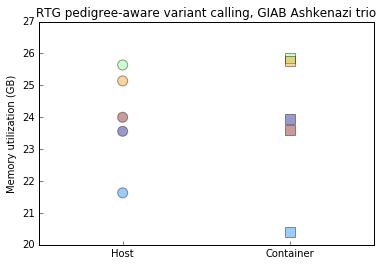

In [24]:
plt.scatter([0] * r9h.shape[0], r9h["gb_memory_used"], c=list(range(r9h.shape[0])), cmap=cm.jet, marker="o", s=100, alpha=0.4, label="Host")
plt.scatter([1] * r9c.shape[0], r9c["gb_memory_used"], c=list(range(r9h.shape[0])), cmap=cm.jet, marker="s", s=100, alpha=0.4, label="Container")
plt.xlim(-0.5, 1.5)
plt.ylabel("Memory utilization (GB)")
plt.xticks([0, 1], ["Host", "Container"])
plt.tick_params(top="off", right="off")
plt.title("RTG pedigree-aware variant calling, GIAB Ashkenazi trio")

plt.savefig(os.path.join(FIGURE_DIR, "9.memory.condensed.png"))